# P4DS Final Project: BankChurners Dataset

Nhóm 26:
Sinh viên thực hiện:
- 23122035 - Châu Văn Minh Khoa
- 23122046 - Phan Ngọc Quân 

## I. DATA COLLECTION

### Dữ liệu của bạn là về chủ đề gì?


- Ngành ngân hàng bán lẻ chịu áp lực lớn trong việc giữ chân khách hàng thẻ tín dụng; nếu khách đóng tài khoản thì doanh thu từ phí và lãi giảm đáng kể.


- Bộ dữ liệu BankChurners ghi nhận hồ sơ khách hàng cá nhân, thói quen sử dụng thẻ, tương tác dịch vụ và trạng thái rời bỏ (`Attrition_Flag`) để đo lường khả năng trung thành.


- Mục tiêu: xây dựng nền tảng phân tích để nhận diện sớm nguy cơ rời bỏ, từ đó đề xuất chương trình chăm sóc hoặc ưu đãi phù hợp giúp duy trì khách hàng giá trị.


- Việc mô hình hóa churn hỗ trợ nhóm kinh doanh tối ưu chi phí marketing, đồng thời cải thiện trải nghiệm khách hàng dựa trên hành vi thực tế.

### Nguồn dữ liệu
- Nguồn: Kaggle – Credit Card Customers (tệp `BankChurners.csv`, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).
- Public date(Kaggle): December 1, 2024

### Quyền sử dụng
- License: CC0-Public Domain, được chia sẻ cho mục đích học tập và nghiên cứu.


- Mục đích sử dụng: phục vụ môn học, tuân thủ điều khoản Kaggle; dữ liệu đã được ẩn danh nhưng vẫn cần tránh suy diễn định danh cá nhân cụ thể.


- Lưu ý đạo đức: các biến tài chính nên được diễn giải có trách nhiệm, không gán nhãn tiêu cực cho nhóm khách hàng cụ thể; khi chia sẻ kết quả cần nêu rõ đây là dữ liệu giả lập/ẩn danh.

### Người ta thu thập dữ liệu như thế nào?
Các bước thực hiện:
- Đăng nhập vào website https://leaps.analyttica.com/home.
- Click on the 'Apply' tab trên góc trên bên trái
- Ở đây, ta có thể tìm thấy nhiều vấn đề của các doanh nghiệp để giải quyết cùng với bộ dataset từ họ.

Ở trên là các bước thực hiện được ghi trên kaggle. Tuy nhiên, do bộ dữ liệu đã khá cũ nên cách trên hiện nay không hoạt động được. Nhóm em có check thử thì thấy trang web đã thay đổi tên miền.

### Mục đích lựa chọn dữ liệu này


- Tập dữ liệu gọn (10k dòng) nhưng đa dạng biến về nhân khẩu học, lịch sử giao dịch, mức độ tương tác; phù hợp để luyện quy trình EDA, tiền xử lý và xây dựng mô hình phân loại churn.

- Bối cảnh ngân hàng quen thuộc với các bài toán khoa học dữ liệu hướng kinh doanh, thuận tiện để trình bày insight định lượng và gợi ý chiến lược.

### Mô tả dữ liệu


- Mỗi dòng: Một khách hàng thẻ tín dụng với trạng thái tiếp tục hay rời bỏ, kèm các đặc trưng nhân khẩu học và hành vi sử dụng thẻ.


- Các nhóm biến chính:


  - Định lượng: `Customer_Age`, `Months_on_book`, `Credit_Limit`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Avg_Utilization_Ratio`,...


  - Phân loại: `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.


- Mục tiêu phân tích: khám phá phân bố, xác định đặc trưng quan trọng ảnh hưởng churn, chuẩn bị cho mô hình dự báo `Attrition_Flag`.


- Thách thức: lớp churn chiếm tỷ lệ nhỏ (~16%), cần lưu ý khi xây dựng mô hình và đánh giá hiệu năng.




> Tóm lại, đây là bộ dữ liệu thực hành kinh điển cho bài toán churn trong lĩnh vực ngân hàng/thẻ tín dụng, thích hợp để minh họa pipeline EDA → tiền xử lý → mô hình phân loại và các khuyến nghị giữ chân khách hàng.

## II. DATA EXPLORATION

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

### Dataset overview

#### Basic Information

##### Đọc dữ liệu

In [ ]:
data_path = "data/BankChurners.csv"
df = pd.read_csv(data_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### Số dòng và cột

In [38]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 10127, Số cột: 23


- Như vậy data có số dòng là 10.127 và số cột là 23.

##### Các dòng dữ liệu
Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [39]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1547,826513233,Existing Customer,54,F,3,Unknown,Married,Less than $40K,Blue,50,...,3796.0,2396,1400.0,0.569,2069,54,0.742,0.631,0.000130,0.99987
9272,712256358,Existing Customer,40,M,3,Graduate,Married,$60K - $80K,Blue,23,...,22729.0,1581,21148.0,1.025,13672,110,0.746,0.070,0.000113,0.99989
9248,714001008,Existing Customer,56,M,1,Uneducated,Divorced,$120K +,Blue,36,...,3730.0,0,3730.0,0.732,13997,102,0.619,0.000,0.000053,0.99995
4139,716556258,Existing Customer,50,F,3,Doctorate,Single,Less than $40K,Blue,39,...,9966.0,0,9966.0,0.966,4401,60,1.069,0.000,0.000139,0.99986
1723,808681158,Existing Customer,57,M,0,Graduate,Married,$80K - $120K,Blue,52,...,2564.0,2379,185.0,0.358,1343,35,0.296,0.928,0.000350,0.99965
2269,710023233,Existing Customer,36,M,3,Graduate,Single,$120K +,Blue,36,...,24457.0,1300,23157.0,0.914,2739,65,0.912,0.053,0.000339,0.99966
2446,790186458,Existing Customer,45,M,3,Uneducated,Single,$80K - $120K,Blue,39,...,17996.0,864,17132.0,0.597,1589,30,0.667,0.048,0.000022,0.99998
4888,720905133,Attrited Customer,43,M,3,Graduate,Unknown,$80K - $120K,Blue,29,...,11422.0,1095,10327.0,0.773,2439,45,0.800,0.096,0.999030,0.00097
6118,718853358,Existing Customer,42,F,3,Graduate,Single,Less than $40K,Blue,36,...,3308.0,2517,791.0,0.543,5104,85,0.545,0.761,0.000057,0.99994
7863,787481208,Existing Customer,46,F,1,Unknown,Unknown,Less than $40K,Blue,34,...,2762.0,1793,969.0,0.901,5006,78,0.660,0.649,0.000112,0.99989


- Mỗi dòng tương ứng một khách hàng thẻ tín dụng, có vẻ không có dòng nào khác biệt bất thường.

##### Overall size

In [40]:
size_mb = os.path.getsize("data/BankChurners.csv") / (1024**2)
print(f"Dataset size: {size_mb:.2f} MB")

Dataset size: 1.44 MB


#### Data Integrity

##### Kiểm tra trùng lặp

In [41]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


- Không có dòng nào bị trùng hoàn toàn cả.

##### Kiểm tra có dòng nào "empty" hoàn toàn không

In [42]:
empty_rows = df.isna().all(axis=1).sum()
print("Số dòng hoàn toàn trống:", empty_rows)

Số dòng hoàn toàn trống: 0


- Không có dòng nào hoàn toàn empty cả

#### Column Inventory

##### Ý nghĩa các cột

In [43]:
list(df.columns.values)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

| Cột | Ý nghĩa |
|---|---|
| CLIENTNUM | Định danh nội bộ của khách hàng trong hệ thống thẻ tín dụng. |
| Attrition_Flag | Trạng thái khách hàng: `Attrited Customer` (đã đóng) hoặc `Existing Customer` (còn hoạt động). |
| Customer_Age | Tuổi của khách hàng. |
| Gender | Giới tính (`M`/`F`). |
| Dependent_count | Số người phụ thuộc trong hộ gia đình. |
| Education_Level | Trình độ học vấn (High School, Graduate, Doctorate, Unknown,...). |
| Marital_Status | Tình trạng hôn nhân (Married, Single, Divorced,...). |
| Income_Category | Nhóm thu nhập hằng năm (ví dụ: `< $40K`, `$60K - $80K`). |
| Card_Category | Hạng thẻ tín dụng (Blue, Silver, Gold, Platinum). |
| Months_on_book | Số tháng khách hàng đã gắn bó với ngân hàng (tuổi thẻ). |
| Total_Relationship_Count | Tổng số sản phẩm tài chính khách hàng sở hữu. |
| Months_Inactive_12_mon | Số tháng không hoạt động trong 12 tháng gần nhất. |
| Contacts_Count_12_mon | Số lần nhân viên liên hệ khách trong 12 tháng gần nhất. |
| Credit_Limit | Hạn mức tín dụng hiện tại. |
| Total_Revolving_Bal | Số dư quay vòng (revolving balance) trên thẻ. |
| Avg_Open_To_Buy | Hạn mức còn lại trung bình (Credit_Limit - Total_Revolving_Bal). |
| Total_Amt_Chng_Q4_Q1 | Mức thay đổi tổng giá trị giao dịch giữa quý 4 và quý 1. |
| Total_Trans_Amt | Tổng giá trị giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Trans_Ct | Tổng số lượng giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Ct_Chng_Q4_Q1 | Mức thay đổi số lượng giao dịch giữa quý 4 và quý 1. |
| Avg_Utilization_Ratio | Tỷ lệ sử dụng tín dụng trung bình (Total_Revolving_Bal / Credit_Limit). |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_1 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 1) hỗ trợ phân loại churn. |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_2 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 2) bổ sung cho biến trên. |

##### Những cột có tiềm năng để phân tích chuyên sâu
Các cột về đặc tính tài khoản (Account / Relationship)

- Months_on_book

- Total_Relationship_Count

- Card_Category

- Credit_Limit

- Avg_Open_To_Buy

- Avg_Utilization_Ratio

##### Drop Columns
- Xóa cột "CLIENTNUM" vì cột này không mang thông tin để phân tích
- Xóa 2 cột cuối cùng "Naive_Bayes_Classifier..." vì 2 cột này không phải dữ liệu thực tế, được khuyến cáo nên xóa trên kaggle

In [44]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=df.columns[-2:])

#### Data Types

##### Kiểu dữ liệu của từng cột

In [45]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

##### Các cột có kiểu dữ liệu không thích hợp
- Nhìn chung thì các cột đều có dữ liệu phù hợp

##### Các cột cần convert data type
- Các cột đều có kiểu dữ liệu phù hợp nên không cột nào cần convert

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

### Numerical Columns Analysis

Trước hết, ta cần filter các cột numerical

In [47]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Phân phối dữ liệu và khuynh hướng trung tâm    

##### Hình dạng phân phối

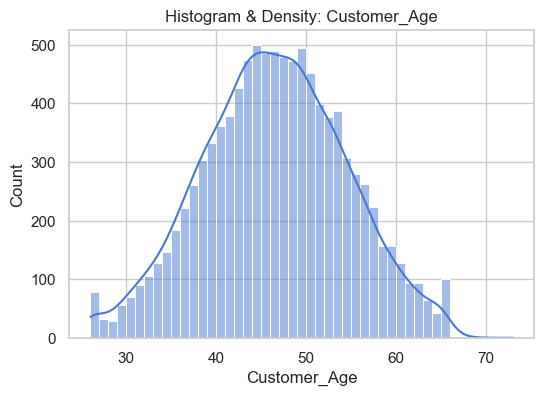


Column: Customer_Age
Độ lệch: -0.033605016317173456
Dữ liệu cân bằng


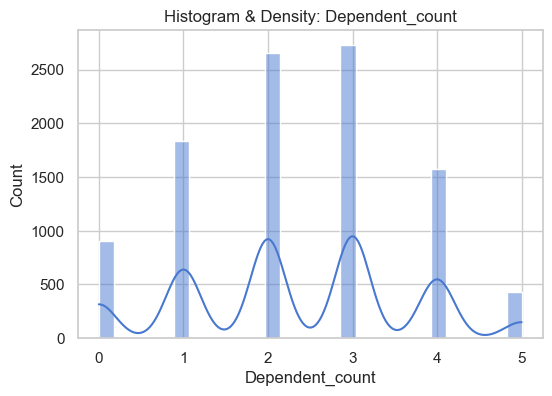


Column: Dependent_count
Độ lệch: -0.020825535616339912
Dữ liệu cân bằng


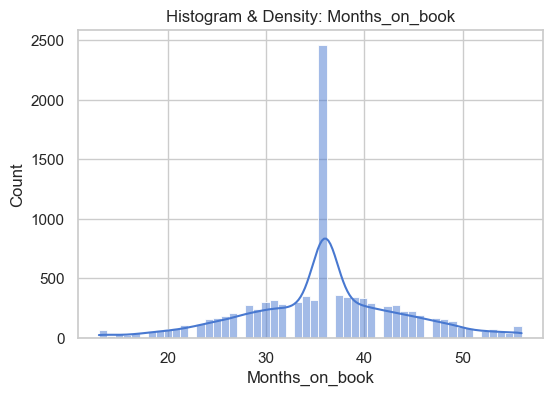


Column: Months_on_book
Độ lệch: -0.10656535989402989
Dữ liệu cân bằng


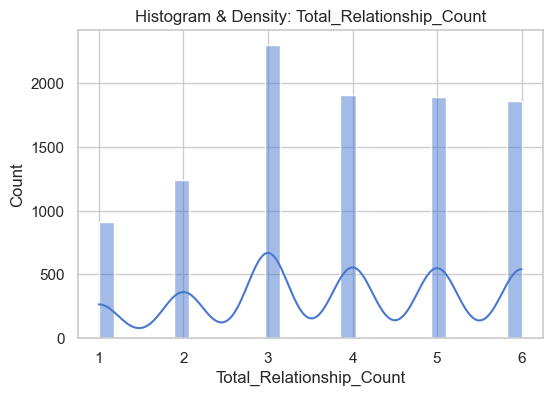


Column: Total_Relationship_Count
Độ lệch: -0.16245241498173682
Dữ liệu cân bằng


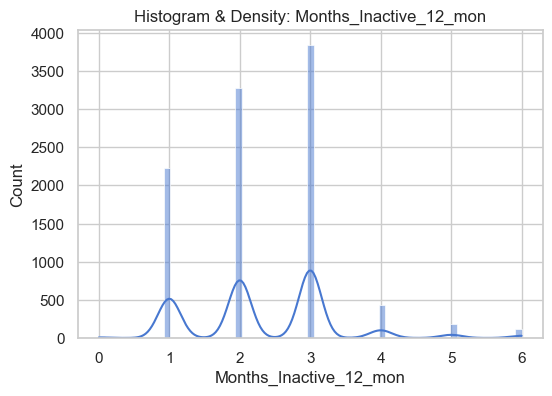


Column: Months_Inactive_12_mon
Độ lệch: 0.6330611289713137
Dữ liệu lệch phải



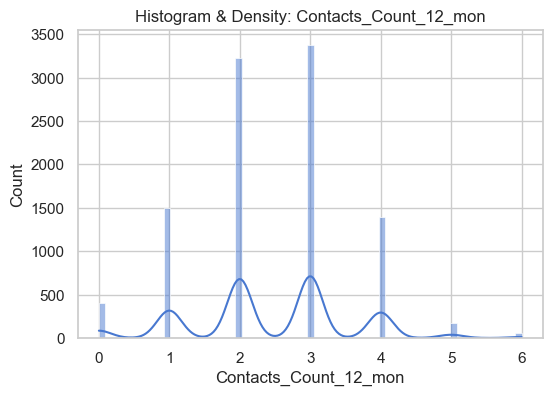


Column: Contacts_Count_12_mon
Độ lệch: 0.011005626218976492
Dữ liệu cân bằng


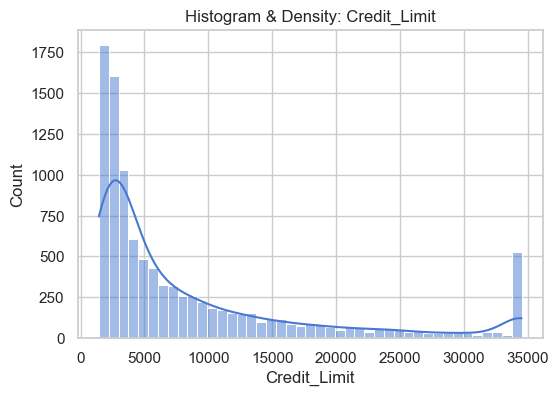


Column: Credit_Limit
Độ lệch: 1.666725807993647
Dữ liệu lệch phải



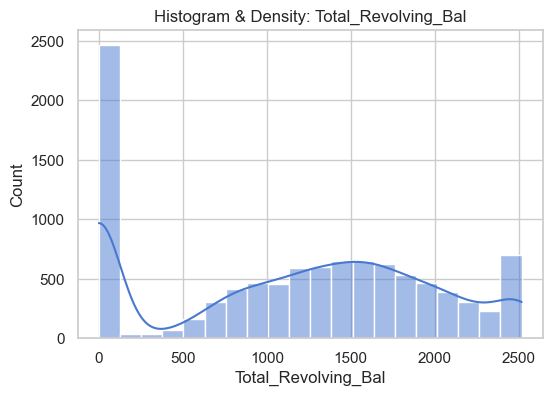


Column: Total_Revolving_Bal
Độ lệch: -0.14883725028007228
Dữ liệu cân bằng


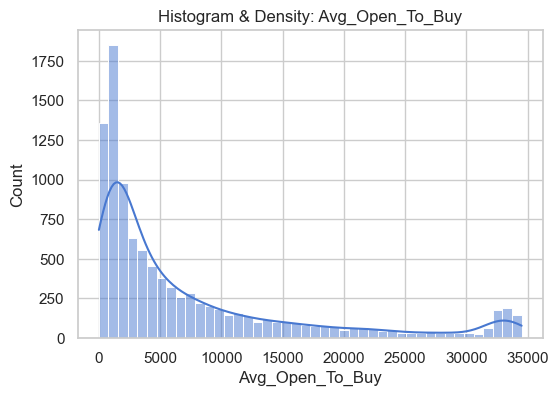


Column: Avg_Open_To_Buy
Độ lệch: 1.6616965459311595
Dữ liệu lệch phải



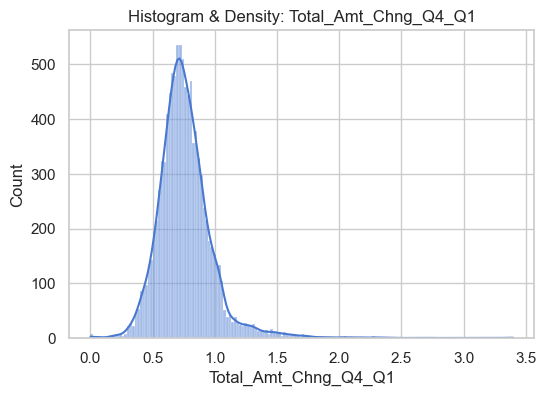


Column: Total_Amt_Chng_Q4_Q1
Độ lệch: 1.7320634114286038
Dữ liệu lệch phải



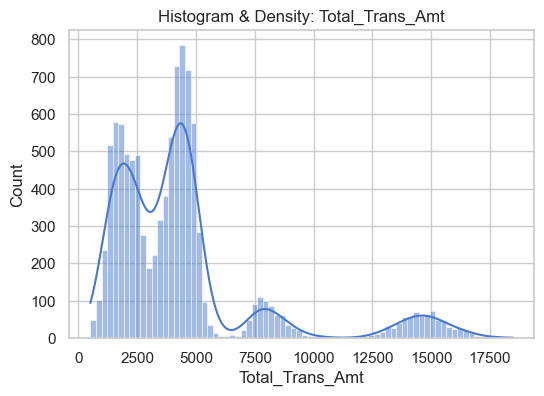


Column: Total_Trans_Amt
Độ lệch: 2.0410034025756936
Dữ liệu lệch phải



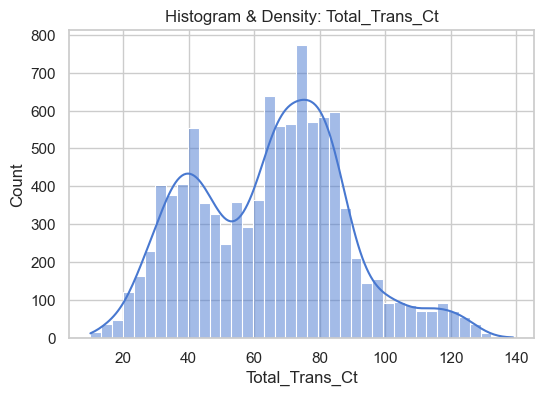


Column: Total_Trans_Ct
Độ lệch: 0.15367306849872275
Dữ liệu cân bằng


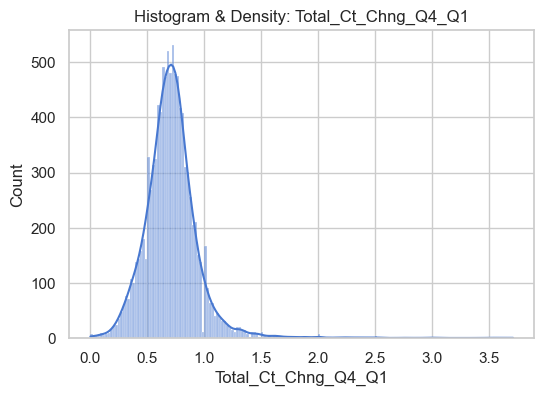


Column: Total_Ct_Chng_Q4_Q1
Độ lệch: 2.0640305679077477
Dữ liệu lệch phải



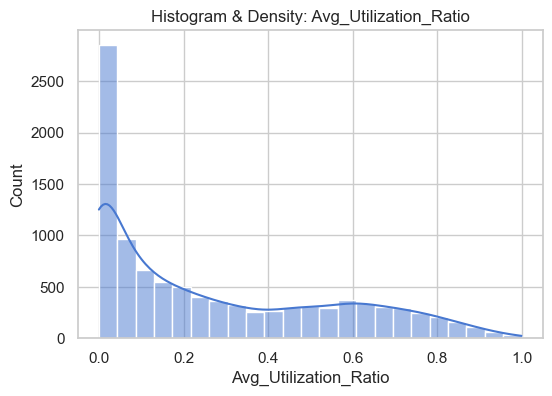


Column: Avg_Utilization_Ratio
Độ lệch: 0.7180079967731994
Dữ liệu lệch phải



In [48]:
skewness = df[numerical_cols].skew()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram & Density: {col}")
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Độ lệch: {skewness[col]}")

    if skewness[col] > 0.5:
        print("Dữ liệu lệch phải\n")
    elif skewness[col] < -0.5:
        print("Dữ liệu lệch trái\n")
    else:
        print("Dữ liệu cân bằng")


Có nhiều biến như Customer_Age hay Dependent_count có phân phối gần chuẩn, tức là khá đối xứng và ổn định. 

Trong khi một số biến tài chính như Credit_Limit, Total_Trans_Amt và Avg_Utilization_Ratio bị lệch phải, nghĩa là phần lớn khách hàng có giá trị thấp, chỉ một nhóm nhỏ có giá trị rất cao. 

Điều này có thể cho chúng ta gợi ý rằng hành vi chi tiêu và sử dụng thẻ của khách hàng không đồng đều và có thể sử dụng yếu tố này để dự đoán nguy cơ rời bỏ.

#### Range & Outliers
Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị mean
- Giá trị min
- Giá trị median
- Giá trị std
- Giá trị max

In [49]:
num_summary_rows = []
for col in numerical_cols:
    s = df[col]
    mean_val = s.mean()
    std_val = s.std()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'mean': mean_val,
        'std': std_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
num_summary_df

,column,mean,std,min,q1,median,q3,max
0,Customer_Age,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


##### Outliers Detection
Chúng ta tiến hành kiểm tra xem các cột dữ liệu số có xuất hiện giá trị ngoại lai (outliers) hay không bằng kỹ thuật IQR outlier detection.

In [50]:
outlier_rows = []
outliers = []
for col in numerical_cols:
    s = df[col].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outliers.append(s[mask].values)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})
pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Customer_Age,2,0.02
1,Dependent_count,0,0.00
2,Months_on_book,386,3.81
3,Total_Relationship_Count,0,0.00
4,Months_Inactive_12_mon,331,3.27
5,Contacts_Count_12_mon,629,6.21
6,Credit_Limit,984,9.72
7,Total_Revolving_Bal,0,0.00
8,Avg_Open_To_Buy,963,9.51
9,Total_Amt_Chng_Q4_Q1,396,3.91


##### Kiểm tra outliers

In [51]:
outlier_rows = []

for i in range(len(numerical_cols)):
    print(f"Outliers in {numerical_cols[i]}: {outliers[i][:10]}")


Outliers in Customer_Age: [73 70]
Outliers in Dependent_count: []
Outliers in Months_on_book: [54 56 56 56 54 56 56 56 54 55]
Outliers in Total_Relationship_Count: []
Outliers in Months_Inactive_12_mon: [6 0 5 0 6 5 5 5 6 5]
Outliers in Contacts_Count_12_mon: [0 0 0 0 0 0 0 0 0 0]
Outliers in Credit_Limit: [34516. 29081. 30367. 32426. 34516. 34516. 23957. 34516. 25300. 34516.]
Outliers in Total_Revolving_Bal: []
Outliers in Avg_Open_To_Buy: [32252. 27685. 28005. 31848. 34516. 34516. 33001. 23970. 32753. 27005.]
Outliers in Total_Amt_Chng_Q4_Q1: [1.335 1.541 2.594 1.405 2.175 1.376 1.975 2.204 3.355 1.524]
Outliers in Total_Trans_Amt: [8693 8947 8854 8796 8778 8644 9331 8987 8780 8753]
Outliers in Total_Trans_Ct: [139 138]
Outliers in Total_Ct_Chng_Q4_Q1: [1.625 3.714 2.333 2.333 2.5   1.182 1.364 3.25  2.    1.7  ]
Outliers in Avg_Utilization_Ratio: []


- Nhận xét: Các giá trị outliers được in ra hoàn toàn có thể xảy ra, không quá bất thường nên các outliers này là "genuine extreme values"

#### Data Quality

In [52]:
missing_summary_rows = []
for col in numerical_cols:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    missing_summary_rows.append({
        'column': col,
        'missing': missing,
        'missing_%': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary_rows)
missing_summary_df

,column,missing,missing_%
0,Customer_Age,0,0.0
1,Dependent_count,0,0.0
2,Months_on_book,0,0.0
3,Total_Relationship_Count,0,0.0
4,Months_Inactive_12_mon,0,0.0
5,Contacts_Count_12_mon,0,0.0
6,Credit_Limit,0,0.0
7,Total_Revolving_Bal,0,0.0
8,Avg_Open_To_Buy,0,0.0
9,Total_Amt_Chng_Q4_Q1,0,0.0


Nhận xét: Tất cả các cột đều đây đủ, không chứa missing values nào. Lý giải một chút, một số tổ chức ngân hàng có quy trình ETL chuẩn:

- Missing được xử lý trước khi release dataset

- Các trường bắt buộc đã có giá trị mặc định

Vậy nên dataset này không chứa missing values nào thì cũng là điều dễ hiểu

### Categorical Columns Analysis

Tương tự như numerical columns, ta cũng lọc các cột categorical

In [53]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Value Distribution

##### Unique values

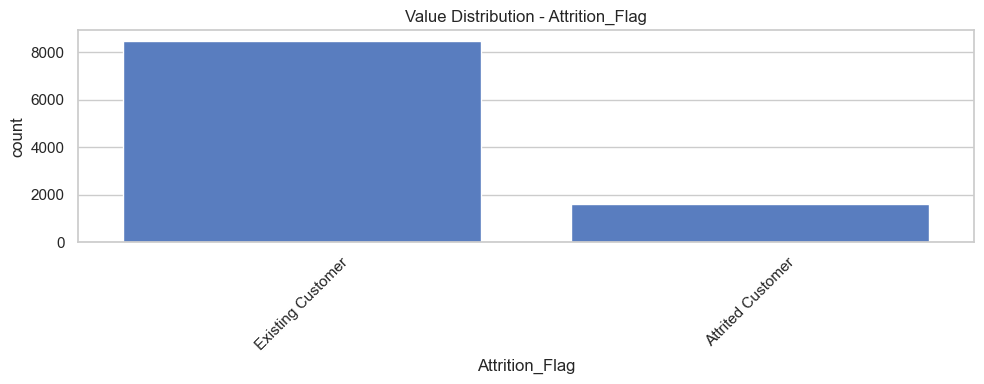


Column: Attrition_Flag
Unique values: 2
Top values:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Dữ liệu không cân bằng



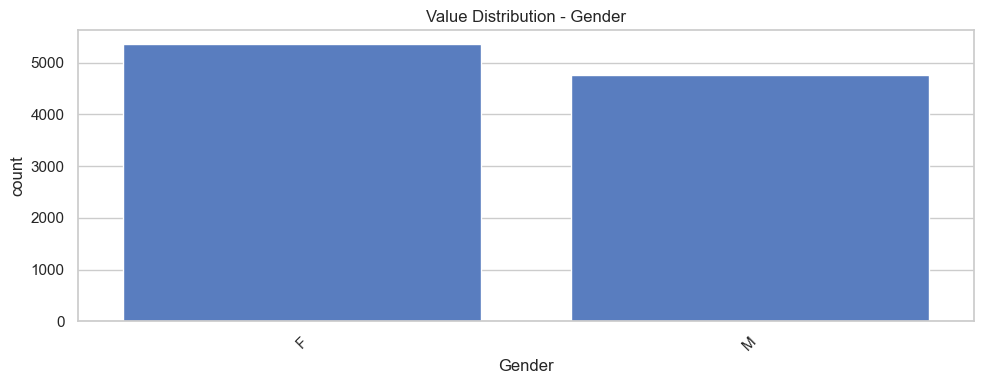


Column: Gender
Unique values: 2
Top values:
Gender
F    5358
M    4769
Name: count, dtype: int64
Dữ liệu cân bằng



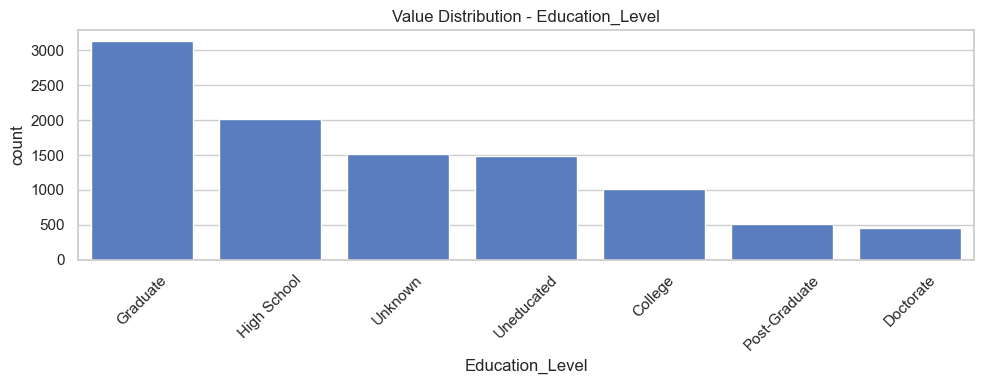


Column: Education_Level
Unique values: 7
Top values:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Dữ liệu cân bằng



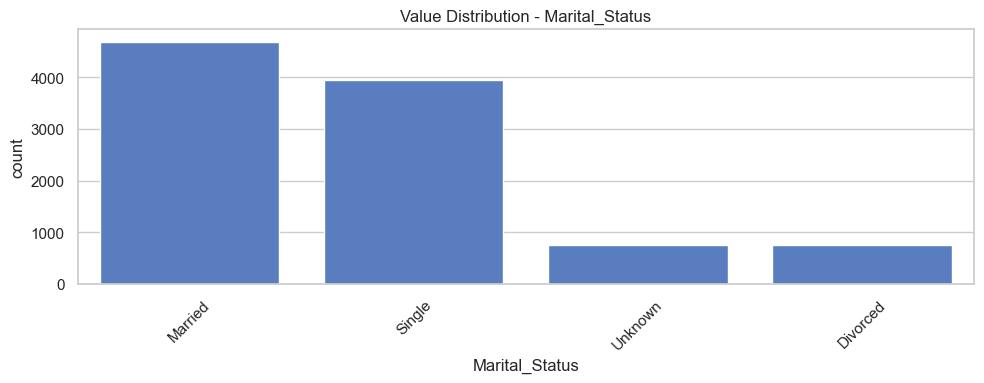


Column: Marital_Status
Unique values: 4
Top values:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Dữ liệu cân bằng



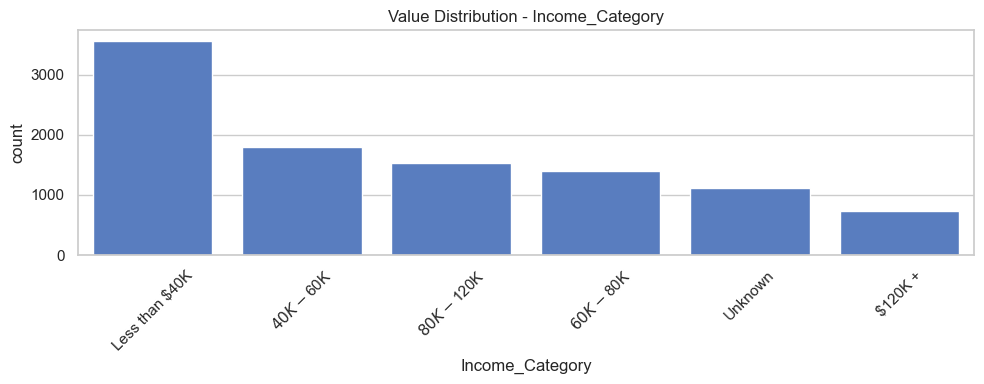


Column: Income_Category
Unique values: 6
Top values:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Dữ liệu cân bằng



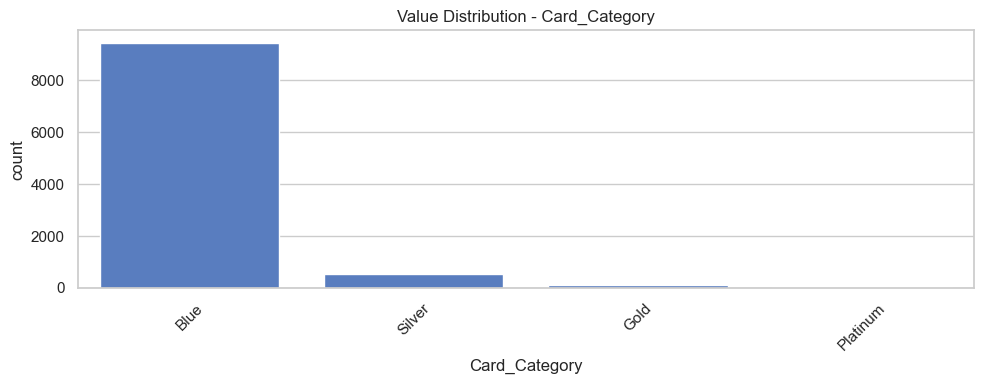


Column: Card_Category
Unique values: 4
Top values:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Dữ liệu không cân bằng



,column,unique_values,top_values
0,Attrition_Flag,2,"{'Existing Customer': 8500, 'Attrited Customer..."
1,Gender,2,"{'F': 5358, 'M': 4769}"
2,Education_Level,7,"{'Graduate': 3128, 'High School': 2013, 'Unkno..."
3,Marital_Status,4,"{'Married': 4687, 'Single': 3943, 'Unknown': 7..."
4,Income_Category,6,"{'Less than $40K': 3561, '$40K - $60K': 1790, ..."
5,Card_Category,4,"{'Blue': 9436, 'Silver': 555, 'Gold': 116, 'Pl..."


In [54]:
summary = []

for col in categorical_cols:
    s = df[col]

    # 1. Số lượng giá trị distinct
    unique_count = s.nunique()

    # 2. Top 10 giá trị frequent
    top_values = s.value_counts().head(10)

    summary.append({
        "column": col,
        "unique_values": unique_count,
        "top_values": top_values.to_dict()
    })

    # 3. Visualization
    plt.figure(figsize=(10, 4))
    sns.countplot(x=s, order=s.value_counts().index)
    plt.title(f"Value Distribution - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Unique values: {unique_count}")
    print(f"Top values:\n{top_values}")

    max_ratio = top_values.iloc[0] / len(s)
    if max_ratio > 0.6:
        print("Dữ liệu không cân bằng\n")
    else:
        print("Dữ liệu cân bằng\n")

pd.DataFrame(summary)


Nhìn nhanh vào các biến phân loại cho thấy khách hàng còn sử dụng thẻ (Existing) chiếm đa số (~84%), hạng thẻ Blue áp đảo, trong khi các hạng cao hơn và trạng thái churn khá ít nên cần cân nhắc kỹ khi trực quan hoặc xây dựng mô hình.

#### Data Quality

Ở đây hơi khác một chút so với numerical cols thì categorical cols có sự xuất hiện của missing values. Cụ thể ở các cột Educational_level, Marital_status, Income_Category có các giá trị "Unknown". Ta có thể xem đây là missing values.

##### Tỉ lệ missing values

In [55]:
for col in categorical_cols:
    missing = len(df[df[col] == "Unknown"])
    missing_pct = round(missing/len(df)*100,2)
    print(f"Column: {col}, Missing: {missing}, Missing %: {missing_pct}%")


Column: Attrition_Flag, Missing: 0, Missing %: 0.0%
Column: Gender, Missing: 0, Missing %: 0.0%
Column: Education_Level, Missing: 1519, Missing %: 15.0%
Column: Marital_Status, Missing: 749, Missing %: 7.4%
Column: Income_Category, Missing: 1112, Missing %: 10.98%
Column: Card_Category, Missing: 0, Missing %: 0.0%


##### Kiểm tra sự giá trị có bị inconsistencied không
Theo quan ở trên, các giá trị đều nhất quán, không có cái nào bị trùng về mặt ý nghĩa

##### Category quá ít quan sát

In [56]:
rare_threshold = 0.01
rare_categories = {}

for col in categorical_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < rare_threshold]
    if len(rare) > 0:
        rare_categories[col] = rare

for col, rare in rare_categories.items():
    print(f"\nColumn: {col}")
    print(rare)


Column: Card_Category
Card_Category
Platinum    0.001975
Name: proportion, dtype: float64


- Nhận xét: ta thấy trong cột Card_Category thì giá trị Platinum chiếm chưa đến 0.2%, quá ít. Giá trị này có thể xem xét gộp chung với giá trị khác

### Missing Data Analysis

Trước hết ta chuyển các giá trị "Unknown" về nan 

In [57]:
df.replace("Unknown", np.nan, inplace=True)

#### Overall Assessment

##### Missing values Summary

In [58]:
missing_summary = []
for col in df.columns:
    missing = df[col].isna().sum()
    missing_pct = round(missing/len(df)*100,2)
    missing_summary.append({
        'column': col,
        'missing': missing,
        'missing_pct': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary)
missing_summary_df


,column,missing,missing_pct
0,Attrition_Flag,0,0.00
1,Customer_Age,0,0.00
2,Gender,0,0.00
3,Dependent_count,0,0.00
4,Education_Level,1519,15.00
5,Marital_Status,749,7.40
6,Income_Category,1112,10.98
7,Card_Category,0,0.00
8,Months_on_book,0,0.00
9,Total_Relationship_Count,0,0.00


Ta có thể thấy không có cột nào bị thiếu dữ liệu cả. Ta tiến sang phần visualization để hình dung rõ hơn về phân phối của các cột dữ liệu phân loại.

##### Visualize missing data patterns

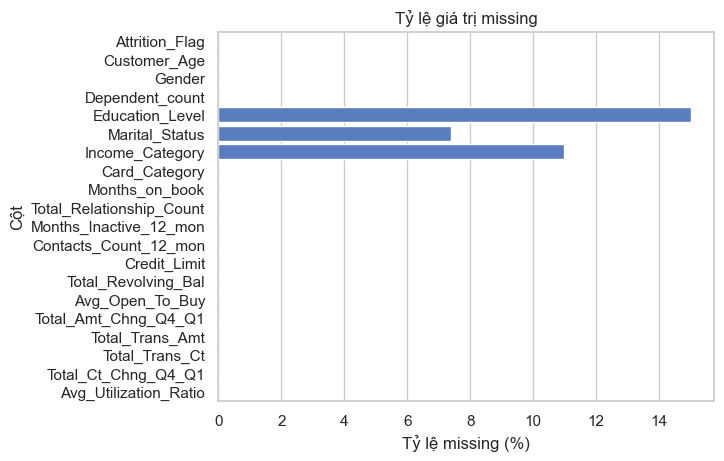

In [59]:
plt.figure()
sns.barplot(x='missing_pct', y='column', data=missing_summary_df)
plt.xlabel('Tỷ lệ missing (%)')
plt.ylabel('Cột')
plt.title('Tỷ lệ giá trị missing')
plt.show()


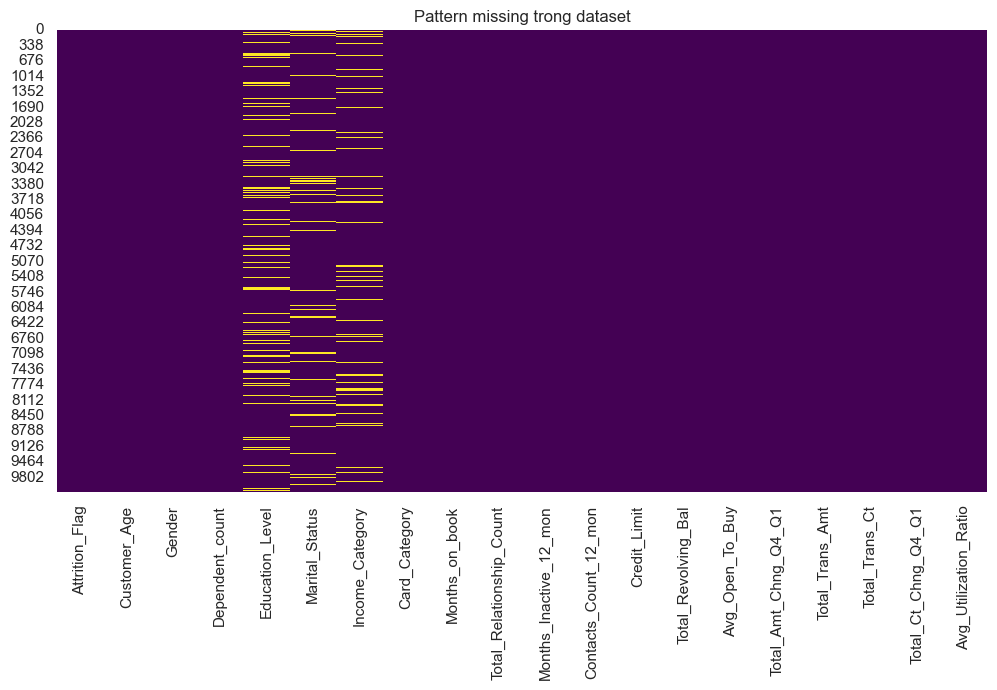

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Pattern missing trong dataset')
plt.show()

- Nhận xét: các missing values phân bố hoàn toàn ngẫu nhiên, không có pattern cụ thể

### Relationships & Correlations

#### Preliminary Patterns

##### Calculate correlation matrix for numerical variables

In [61]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr() 
print(corr_matrix.head())

                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age   

##### Correlation heatmap

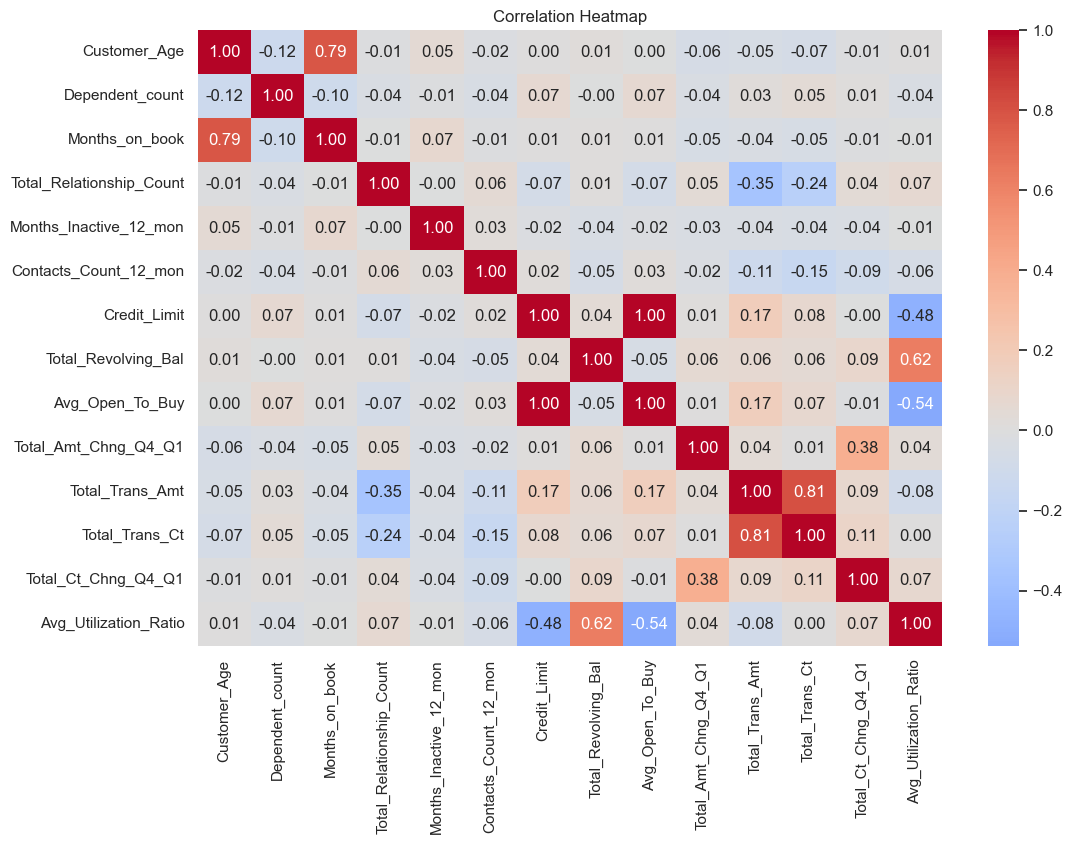

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##### Identify strongly correlated pairs

In [63]:
strong_corrs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i,j]
        if abs(corr_value) >= 0.7:
            strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

strong_corrs_df = pd.DataFrame(strong_corrs, columns=['Column1', 'Column2', 'Correlation'])
print(strong_corrs_df)

           Column1          Column2  Correlation
0     Customer_Age   Months_on_book     0.788912
1     Credit_Limit  Avg_Open_To_Buy     0.995981
2  Total_Trans_Amt   Total_Trans_Ct     0.807192


Nhận xét: 
- Customer_Age vs Months_on_book: Không quá bất ngờ, vì tuổi tác thường liên quan đến độ trung thành hoặc thời gian sử dụng dịch vụ
- Credit_Limit vs Avg_Open_To_Buy: Đây là mối quan hệ công thức, không phải thực tế hành vi khách hàng
- Total_Trans_Amt vs Total_Trans_Ct: Hợp lý, nhưng cũng có thể cần kiểm tra giao dịch trung bình để xem có khách hàng nào chi tiêu lớn chỉ với ít giao dịch hay không.

#### Cross-tabulations

##### Categorical × categorical combinations

In [64]:
crosstab = pd.crosstab(df['Gender'], df['Education_Level'], margins=True)
crosstab

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,All
Gender,,,,,,,
F,532,257,1670,1028,263,796,4546
M,481,194,1458,985,253,691,4062
All,1013,451,3128,2013,516,1487,8608


In [65]:
crosstab = pd.crosstab(df['Education_Level'], df['Income_Category'], margins=True)
crosstab

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,All
Education_Level,,,,,,
College,70,183,132,175,345,905
Doctorate,37,70,59,57,158,381
Graduate,204,553,422,478,1139,2796
High School,147,355,307,308,671,1788
Post-Graduate,30,111,77,81,170,469
Uneducated,119,249,195,217,522,1302
All,607,1521,1192,1316,3005,7641


##### Numerical × categorical combinations

In [66]:
df.groupby('Attrition_Flag')['Total_Trans_Amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


### Initial Observations & Insights

#### Summary

##### Một số observation
- 

##### Một số vấn đề về data quality
- Data đang bị mất cân bằng ở cột "Attrition"
- Data đang bị missing value tại các cột categorical: Education_Level, Marital_Status, Income_Category

##### Các bước tiền xử lý cần có

- Xử lý imbalance
- Xử lý missing values

#### Red Flags

## IV. QUESTION FORMULATION

### Câu hỏi 1: 
- Phát biểu: Chỉ số thay đổi hành vi giữa Q4 và Q1 (Total_Amt_Chng_Q4_Q1 và Total_Ct_Chng_Q4_Q1) đóng vai trò như thế nào trong việc dự báo rời bỏ?
- Lý do lựa chọn: 
- Ý nghĩa: Rời bỏ không bao giờ diễn ra ngay lập tức. Nó là một quá trình "nguội lạnh" dần. Nếu phát hiện ra chỉ số này giảm, ngân hàng có thể can thiệp (gọi điện, tặng voucher) trước khi khách hàng kịp đóng thẻ.

### Câu hỏi 2: 
- Phát biểu: Mối quan hệ "tam giác" giữa Contacts_Count_12_mon (Số lần liên hệ), Months_Inactive_12_mon (Thời gian không hoạt động) và Attrition_Flag là gì?
- Lý do lựa chọn: Nhóm em muốn kiểm tra giả thuyết: Khách hàng liên hệ nhiều(phàn nàn) + Không hoạt động thẻ = Rời bỏ cực cao (Do thất vọng về dịch vụ) hay ngược lại: Khách hàng không liên hệ + Không hoạt động = Rời bỏ thầm lặng (Silent Attrition - Do quên lãng).
- Ý nghĩa: Phân biệt được lý do rời bỏ để có kịch bản CSKH khác nhau. Một bên cần giải quyết khiếu nại, một bên cần nhắc nhớ thương hiệu.

### Câu hỏi 3: 
- Phát biểu: Nhóm tuổi nào trong dữ liệu có tỷ lệ churn cao và thấp nhất?
- Lý do lựa chọn: Nhiều phân tích cho thấy nhóm tuổi trung niên có tỷ lệ rời bỏ cao nhất. Tuy nhiên ta cần kiểm chứng với bộ dữ liệu cụ thể hiện có.
- Ý nghĩa: Tìm ra những nhóm có tỷ lệ rời bỏ cao giúp cho người chủ doanh nghiệp tập trung các dịch vụ tốt hơn vào các nhóm này.

### Câu hỏi 4: 
- Phát biểu: Liệu những khách hàng sở hữu hạn mức tín dụng cao (Credit Limit cao) nhưng lại để thẻ 'đóng băng' là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không?
- Lý do lựa chọn: Chúng ta thường lo ngại về rủi ro tín dụng khi khách hàng xài 'kịch' hạn mức, nhưng nhìn vào tương quan âm trên Heatmap, chúng em có thắc mắc: Liệu có phải chính những khách hàng sở hữu credit limit cao nhưng lại có Utilization thấp mới là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không?
- Ý nghĩa: Nếu có thể dự báo trước việc khách hàng rời bỏ bằng số liệu tín dụng của khách hàng thì sẽ giúp ngân hàng can thiệp kịp thời.

### Câu hỏi 5: 
- Phát biểu: Các hành vi giao dịch và liên lạc trong 12 tháng gần nhất có thể dự báo churn không? Các biến đổi trong hành vi giao dịch (`Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Total_Trans_Amt`, `Total_Trans_Ct`) có liên quan mạnh tới việc khách bỏ đi không?
- Lý do lựa chọn:
- Ý nghĩa: Nếu có sự liên quan mạnh giữa các yếu tố này đối với việc rời bỏ của khách hàng thì ngân hàng có thể cải thiện chất lượng dịch vụ kịp thời hơn.

| Câu hỏi | Ý nghĩa |
|---|---|
| Tổng số sản phẩm khách hàng nắm giữ(Total_Relationship_Count) có tỷ lệ nghịch với khả năng rời bỏ không? | Rời bỏ không bao giờ diễn ra ngay lập tức. Nó là một quá trình "nguội lạnh" dần. Nếu phát hiện ra chỉ số này giảm, ngân hàng có thể can thiệp (gọi điện, tặng voucher) trước khi khách hàng kịp đóng thẻ. |
| Mối quan hệ "tam giác" giữa Contacts_Count_12_mon (Số lần liên hệ), Months_Inactive_12_mon (Thời gian không hoạt động) và Attrition_Flag là gì? | Phân biệt được lý do rời bỏ để có kịch bản CSKH khác nhau. Một bên cần giải quyết khiếu nại, một bên cần nhắc nhớ thương hiệu. |
| Nhóm tuổi nào trong dữ liệu có tỷ lệ churn cao và thấp nhất? | Nhiều phân tích cho thấy nhóm tuổi trung niên có tỷ lệ rời bỏ cao nhất. Nhưng ta cần kiểm tra vấn đề này đối với dữ liệu hiện có và tìm ra những nhóm có tỷ lệ rời bỏ cao giúp cho người chủ doanh nghiệp tập trung các dịch vụ tốt hơn vào các nhóm này. |
| Liệu những khách hàng sở hữu hạn mức tín dụng cao (Credit Limit cao) nhưng lại để thẻ 'đóng băng' là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không? | Chúng ta thường lo ngại về rủi ro tín dụng khi khách hàng xài 'kịch' hạn mức, nhưng nhìn vào tương quan âm trên Heatmap, chúng em có thắc mắc: Liệu có phải chính những khách hàng sở hữu credit limit cao nhưng lại có Utilization thấp mới là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không? |
| Các hành vi giao dịch và liên lạc trong 12 tháng gần nhất có thể dự báo churn không? Các biến đổi trong hành vi giao dịch (`Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Total_Trans_Amt`, `Total_Trans_Ct`) có liên quan mạnh tới việc khách bỏ đi không? | Nếu thật sự có sự liên quan giữa hành vi giao dịch và sự rời bỏ của khách hàng, ngân hàng có thể cải thiện chất lượng dịch vụ kịp thời hơn. |

## V. DATA ANALYSIS

Tiền xử lí và phân tích dữ liệu để đưa ra trả lời cho từng câu hỏi 

#### **1. Tổng số sản phẩm khách hàng nắm giữ(Total_Relationship_Count) có tỷ lệ nghịch với khả năng rời bỏ không?**

### A. Tiền xử lý

1. Kiểm tra và chuẩn hóa kiểu dữ liệu của 2 cột `Total_Relationship_Count` và `Attrition_Flag`
- `Total_Relationship_Count`: kiểm tra xem dữ liệu ở dạng số nguyên hay chưa
- `Attrition_Flag`: kiểm tra xem đã ở dạng nhị phân 0/1 hay chưa

Mục đích: dễ phân tích, dễ tính tỷ lệ và mô hình hóa.

2. Kiểm tra và xử lý missing values
 - Kiểm tra cột `Total_Relationship_Count` nếu tồn tại missing_values thì xử lý bằng cách điền giá trị thiếu bằng mean.
 - Đối với cột 'Attrition_Flag`: vì đây là cột mục tiêu(target) nên đảm bảo không chứa missing values

Mục đích: dễ phân tích, tăng độ chính xác

3. Kiểm tra và xử lý giá trị ngoại lai

Mục đích: Các chỉ số tỷ lệ (Ratio) thường có các giá trị cực đại bất thường. Chúng ta cần kiểm tra xem có giá trị nào quá vô lý (ví dụ: vô cực hoặc quá lớn do chia cho số gần 0) để xử lý hoặc ghi nhận, đảm bảo biểu đồ Boxplot không bị biến dạng.

In [67]:
df1 = df.copy()
# Chuẩn hóa kiểu dữ liệu
if df1['Total_Relationship_Count'].dtype != 'int64':
    df1['Total_Relationship_Count'].astype('int64')

if df1['Attrition_Flag'].unique().tolist() != [0, 1]:
    # Ta dung cau lenh np.where de kiem tra dieu kien, neu la 'Attrited Customer' thi 
    # chuyen ve 0, nguoc lai chuyen ve 1
    df1['Attrition_Flag'] = np.where(df1['Attrition_Flag'] == 'Attrited Customer', 1, 0)

# Kiem tra missing values
if df1['Total_Relationship_Count'].isna().sum() != 0:
    # Tinh mean de thay the missing value
    mean_total_rel_count = df1['Total_Relationship_Count'].mean()
    df1['Total_Relationship_Count'] = df1['Total_Relationship_Count'].fillna(mean_total_rel_count)


### B. Phân tích

- Descriptive Statistics (Thống kê mô tả): Sử dụng groupby để tính Mean (Trung bình) và Median (Trung vị) cho hai nhóm. So sánh độ chênh lệch phần trăm (% Gap).
- T-Test (Kiểm định T): Thực hiện kiểm định Independent T-test để xác định xem sự khác biệt giữa hai nhóm có ý nghĩa thống kê hay chỉ là ngẫu nhiên.
Giả thuyết H0: Không có sự khác biệt về chỉ số thay đổi hành vi giữa người rời bỏ và người ở lại.
Nếu p-value < 0.05: Bác bỏ H0 -> Sự khác biệt là có thật và quan trọng.

In [68]:
def statistical_comparison(df, col_name):
    print(f"=== PHÂN TÍCH THỐNG KÊ: {col_name} ===")
    
    # 1. Tính toán các chỉ số mô tả
    stats_df = df.groupby('Attrition_Flag')[col_name].agg(['mean', 'median', 'std'])
    print("Bảng thống kê sơ bộ:")
    print(stats_df) # In ra để xem Index thực sự là gì
    
    # --- PHẦN SỬA LỖI ---
    try:
        # Cố gắng lấy theo tên string gốc
        median_churn = stats_df.loc['Attrited Customer', 'median']
        median_exist = stats_df.loc['Existing Customer', 'median']
    except KeyError:
        # Nếu lỗi (do dữ liệu đã chuyển thành số), thử lấy theo index 0 và 1
        # Giả định: 1 là Attrited (Rời bỏ), 0 là Existing (Hiện tại) - Cần check lại mapping của bạn
        # Thông thường trong bài toán này: Attrited=1, Existing=0
        if 1 in stats_df.index and 0 in stats_df.index:
            median_churn = stats_df.loc[1, 'median']
            median_exist = stats_df.loc[0, 'median']
            print("(Đã tự động chuyển sang truy xuất theo index số 1 và 0)")
        else:
            print("Lỗi: Không xác định được index của Attrited/Existing.")
            return # Dừng hàm
            
    # Tính % Chênh lệch
    gap_percent = ((median_churn - median_exist) / median_exist) * 100
    print(f"\n-> Chênh lệch Trung vị (Attrited vs Existing): {gap_percent:.2f}%")
    
    # 2. Kiểm định T-test
    # Cần lọc dữ liệu dựa trên giá trị thực tế của cột Attrition_Flag
    # Nếu cột là string
    if df['Attrition_Flag'].dtype == 'object':
        churn_data = df[df['Attrition_Flag'] == 'Attrited Customer'][col_name]
        exist_data = df[df['Attrition_Flag'] == 'Existing Customer'][col_name]
    else:
        # Nếu cột là số (1 và 0)
        churn_data = df[df['Attrition_Flag'] == 1][col_name]
        exist_data = df[df['Attrition_Flag'] == 0][col_name]
    
    t_stat, p_val = stats.ttest_ind(churn_data, exist_data, equal_var=False)
    
    print(f"\n-> Kết quả T-test: Statistic={t_stat:.2f}, p-value={p_val:.4e}")
    if p_val < 0.05:
        print("=> KẾT LUẬN: Sự khác biệt có ý nghĩa thống kê.")
    else:
        print("=> KẾT LUẬN: Sự khác biệt không có ý nghĩa thống kê.")
    print("-" * 50)
# Thực thi phân tích
statistical_comparison(df1, 'Total_Amt_Chng_Q4_Q1')
statistical_comparison(df1, 'Total_Ct_Chng_Q4_Q1')

=== PHÂN TÍCH THỐNG KÊ: Total_Amt_Chng_Q4_Q1 ===
Bảng thống kê sơ bộ:
                    mean  median       std
Attrition_Flag                            
0               0.772510   0.743  0.217783
1               0.694277   0.701  0.214924
(Đã tự động chuyển sang truy xuất theo index số 1 và 0)

-> Chênh lệch Trung vị (Attrited vs Existing): -5.65%

-> Kết quả T-test: Statistic=-13.42, p-value=1.3059e-39
=> KẾT LUẬN: Sự khác biệt có ý nghĩa thống kê.
--------------------------------------------------
=== PHÂN TÍCH THỐNG KÊ: Total_Ct_Chng_Q4_Q1 ===
Bảng thống kê sơ bộ:
                    mean  median       std
Attrition_Flag                            
0               0.742434   0.721  0.228054
1               0.554386   0.531  0.226854
(Đã tự động chuyển sang truy xuất theo index số 1 và 0)

-> Chênh lệch Trung vị (Attrited vs Existing): -26.35%

-> Kết quả T-test: Statistic=-30.61, p-value=7.1561e-173
=> KẾT LUẬN: Sự khác biệt có ý nghĩa thống kê.
----------------------------------

### C. Trực quan hóa

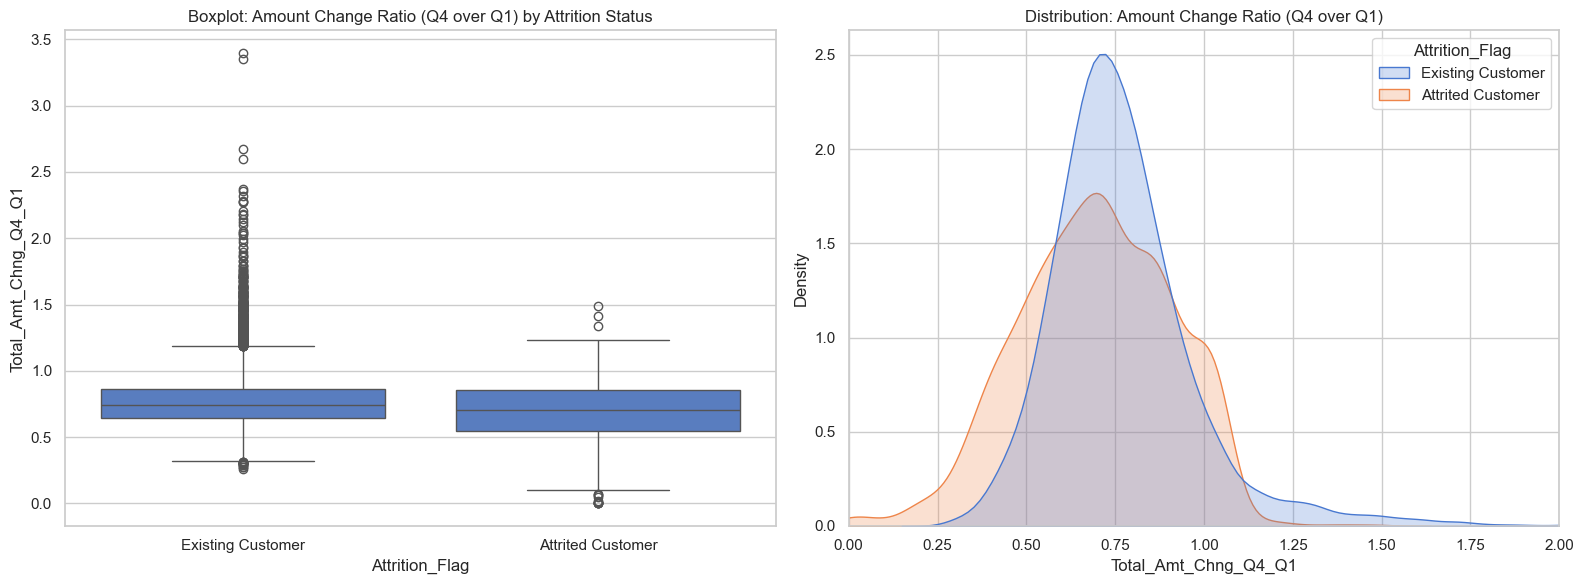

--- Thống kê cho Total_Amt_Chng_Q4_Q1 ---
                       mean  median       std
Attrition_Flag                               
Attrited Customer  0.694277   0.701  0.214924
Existing Customer  0.772510   0.743  0.217783


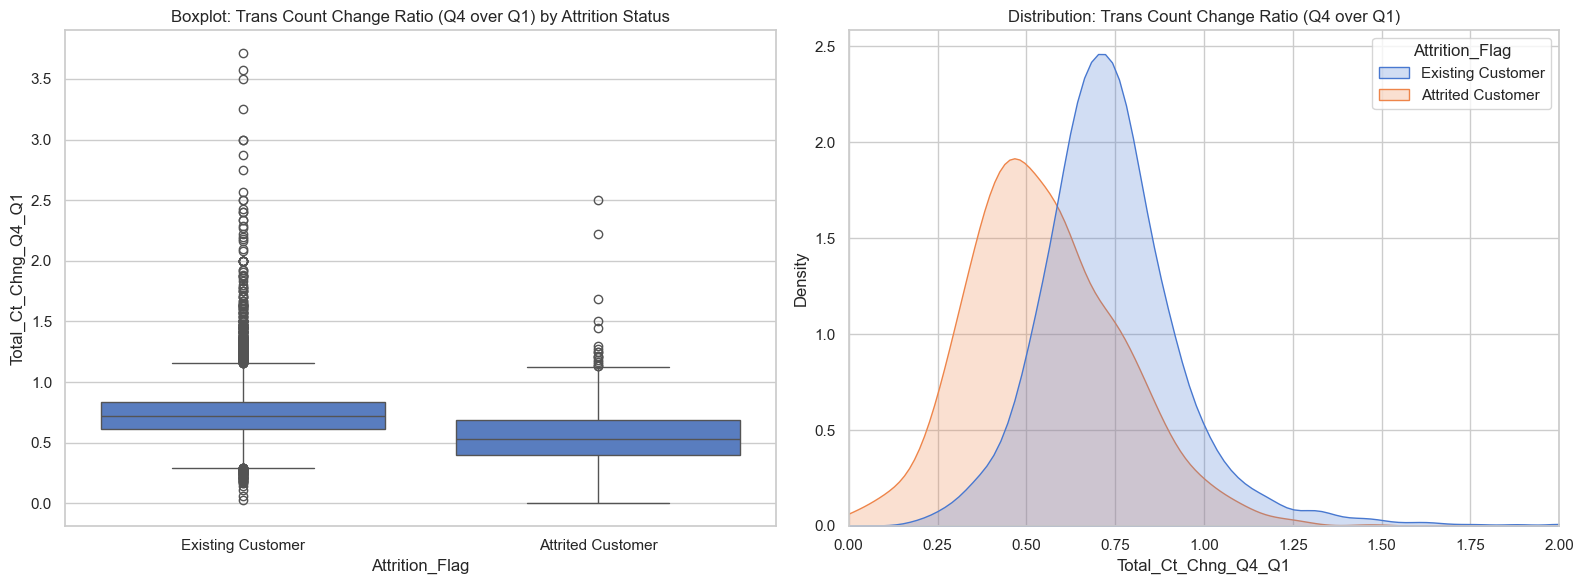

--- Thống kê cho Total_Ct_Chng_Q4_Q1 ---
                       mean  median       std
Attrition_Flag                               
Attrited Customer  0.554386   0.531  0.226854
Existing Customer  0.742434   0.721  0.228054


In [69]:
# Thiết lập phong cách hiển thị
sns.set(style="whitegrid", palette="muted")

def analyze_change_ratios(df, col_name, title_suffix):
    """
    Hàm vẽ biểu đồ Boxplot và KDE để so sánh phân phối giữa 2 nhóm
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Biểu đồ 1: Boxplot - So sánh trung vị và độ trải giữa các nhóm
    sns.boxplot(x='Attrition_Flag', y=col_name, data=df, ax=axes[0])
    axes[0].set_title(f'Boxplot: {title_suffix} by Attrition Status')
    
    # Biểu đồ 2: KDE Plot - So sánh hình dáng phân phối (mật độ)
    sns.kdeplot(data=df, x=col_name, hue='Attrition_Flag', fill=True, common_norm=False, ax=axes[1])
    axes[1].set_title(f'Distribution: {title_suffix}')
    axes[1].set_xlim(0, 2.0) # Giới hạn trục x để tập trung vào vùng dữ liệu chính
    
    plt.tight_layout()
    plt.show()

    # In ra số liệu thống kê cụ thể
    print(f"--- Thống kê cho {col_name} ---")
    print(df.groupby('Attrition_Flag')[col_name].agg(['mean', 'median', 'std']))

# Thực thi phân tích cho Amount Change (Thay đổi giá trị tiền)
analyze_change_ratios(df, 'Total_Amt_Chng_Q4_Q1', 'Amount Change Ratio (Q4 over Q1)')

# Thực thi phân tích cho Count Change (Thay đổi số lượng giao dịch)
analyze_change_ratios(df, 'Total_Ct_Chng_Q4_Q1', 'Trans Count Change Ratio (Q4 over Q1)')

#### **2. **

### A. Tiền xử lý

### B. Phân tích

### C. Trực quan hóa

#### **3. Nhóm tuổi nào trong dữ liệu có tỷ lệ rời bỏ cao và thấp nhất?**

### A. Tiền xử lý
- Trích hai cột `Customer_Age` và `Attrition_Flag`, chuẩn hóa nhãn churn về dạng nhị phân.
- Phân nhóm tuổi theo khoảng 5 năm để so sánh công bằng giữa các thế hệ khách hàng.
- Giữ lại bảng kết quả sạch phục vụ bước phân tích và trực quan hóa.


#### Mô tả quy trình
Các bước chính: chuẩn hóa nhãn churn, cắt nhóm tuổi, và kiểm tra nhanh dữ liệu vừa tạo.


In [ ]:
age_bins = [0, 30, 35, 40, 45, 50, 55, 60, np.inf]
age_labels = ["<30", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60+"]

age_df = df[['Customer_Age', 'Attrition_Flag']].copy()
age_df['Attrition_Flag'] = age_df['Attrition_Flag'].astype(str).str.strip()
age_df['is_churn'] = age_df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
if age_df['is_churn'].isna().any():
    raise ValueError('Không map được toàn bộ giá trị Attrition_Flag sang nhị phân')

age_df = age_df.dropna(subset=['Customer_Age'])
age_df['age_group'] = pd.cut(
    age_df['Customer_Age'],
    bins=age_bins,
    labels=age_labels,
    right=False,
    include_lowest=True,
    ordered=True,
)

age_df[['Customer_Age', 'age_group', 'Attrition_Flag', 'is_churn']].head()

,Customer_Age,age_group,Attrition_Flag,is_churn
0,45,45-49,Existing Customer,0
1,49,45-49,Existing Customer,0
2,51,50-54,Existing Customer,0
3,40,40-44,Existing Customer,0
4,40,40-44,Existing Customer,0


### B. Phân tích
- Tính số khách hàng, số churn và tỷ lệ churn cho từng `age_group`.
- Gắn nhãn nhóm có tỷ lệ cao nhất/thấp nhất để nổi bật trong bảng thống kê.


In [72]:
age_summary = (
    age_df.groupby('age_group', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
    .rename(columns={'age_group': 'Age_Group'})
)
age_summary['churn_rate'] = (age_summary['churn_rate'] * 100).round(2)
age_summary = age_summary.sort_values('Age_Group')

max_group = age_summary.loc[age_summary['churn_rate'].idxmax()]
min_group = age_summary.loc[age_summary['churn_rate'].idxmin()]

age_summary['Ghi_chu'] = np.select(
    [
        age_summary['Age_Group'] == max_group['Age_Group'],
        age_summary['Age_Group'] == min_group['Age_Group'],
    ],
    ['Tỷ lệ cao nhất', 'Tỷ lệ thấp nhất'],
    default='',
)

age_summary


,Age_Group,customers,churners,churn_rate,Ghi_chu
0,<30,195,17,8.72,Tỷ lệ thấp nhất
1,30-34,540,84,15.56,
2,35-39,1301,177,13.60,
3,40-44,2139,371,17.34,
4,45-49,2422,401,16.56,
5,50-54,1920,315,16.41,
6,55-59,1078,191,17.72,Tỷ lệ cao nhất
7,60+,532,71,13.35,


#### Điểm nhấn từ bảng thống kê
- Nhóm 55-59 tuổi có tỷ lệ churn cao nhất (17.72%).
- Nhóm dưới 30 tuổi có tỷ lệ churn thấp nhất (8.72%).


### C. Trực quan hóa, kết quả và phân tích
- Biểu đồ cột thể hiện tỷ lệ churn theo nhóm tuổi có kèm đường chuẩn toàn bộ.
- Biểu đồ tròn mô tả tỷ trọng số khách hàng churn đến từ từng nhóm tuổi.


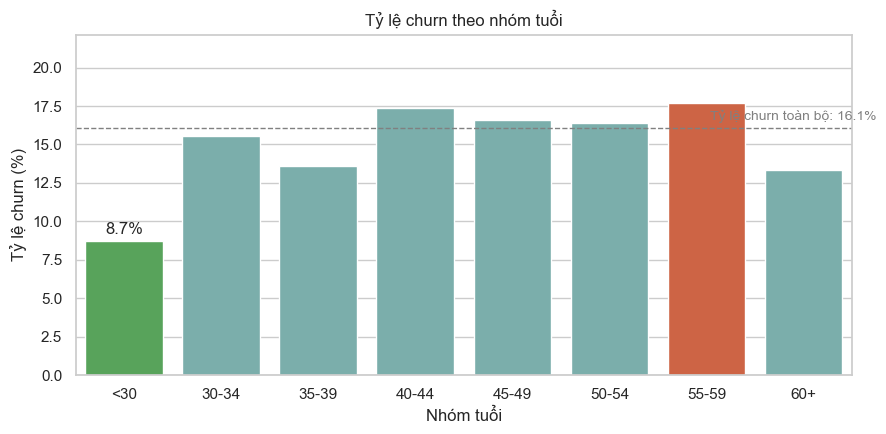

In [73]:
special_colors = {
    str(max_group['Age_Group']): '#E4572E',
    str(min_group['Age_Group']): '#4CAF50',
}
default_color = '#72B7B2'

color_series = age_summary['Age_Group'].astype(str).map(lambda g: special_colors.get(g, default_color))
overall_churn_pct = age_df['is_churn'].mean() * 100

fig, ax = plt.subplots(figsize=(9, 4.5))
sns.barplot(
    data=age_summary,
    x='Age_Group',
    y='churn_rate',
    hue='Age_Group',
    palette=color_series.to_list(),
    legend=False,
    ax=ax,
)
ax.axhline(overall_churn_pct, color='gray', linestyle='--', linewidth=1)
ax.text(
    x=len(age_summary) - 0.25,
    y=overall_churn_pct + 0.3,
    s=f'Tỷ lệ churn toàn bộ: {overall_churn_pct:.1f}%',
    ha='right',
    va='bottom',
    color='gray',
    fontsize=10,
)
ax.set_xlabel('Nhóm tuổi')
ax.set_ylabel('Tỷ lệ churn (%)')
ax.set_title('Tỷ lệ churn theo nhóm tuổi')
ax.set_ylim(0, age_summary['churn_rate'].max() * 1.25)
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)
plt.tight_layout()
plt.show()


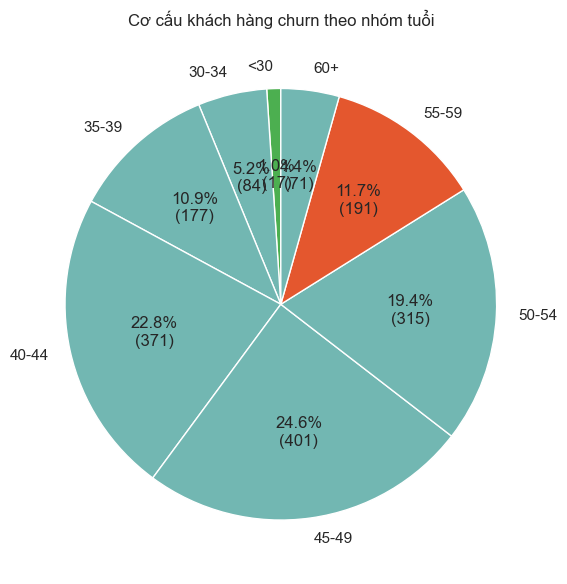

In [74]:
total_churners = age_summary['churners'].sum()


def _autopct(pct):
    count = int(round(pct * total_churners / 100))
    return f"{pct:.1f}%\n({count})"


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    age_summary['churners'],
    labels=age_summary['Age_Group'],
    colors=color_series.to_list(),
    autopct=_autopct,
    startangle=90,
)
ax.set_title('Cơ cấu khách hàng churn theo nhóm tuổi')
plt.tight_layout()
plt.show()


Kết luận:
- Tỷ lệ churn tăng dần từ nhóm 30-34 và đạt đỉnh ở nhóm 55-59 (17.72%), sau đó giảm nhẹ ở nhóm 60+.
- Nhóm dưới 30 tuổi là nhóm rủi ro thấp nhất (8.72%), gợi ý cần ít ưu tiên hơn trong các chiến dịch giữ chân.
- Về quy mô tuyệt đối, nhóm 40-44 đóng góp nhiều khách hàng churn nhất (371 người, 22.8% tổng churn), vì quy mô khách gốc lớn.
- Ngân hàng nên tập trung các chương trình giữ chân vào dải tuổi 40-59, đặc biệt theo dõi các tín hiệu suy giảm hoạt động trong nhóm 55-59 để can thiệp kịp thời.


#### **4. Liệu những khách hàng sở hữu hạn mức tín dụng cao (Credit Limit cao) nhưng lại để thẻ 'đóng băng' mới là nhóm đang âm thầm rời bỏ ngân hàng nhiều nhất hay không?**

### A. Tiền xử lý (Preprocessing)

#### Mô tả quy trình
- Chuẩn hóa `Attrition_Flag` thành nhãn nhị phân để đo churn chính xác.
- Giữ lại hai biến trọng tâm `Credit_Limit` và `Avg_Utilization_Ratio`, đồng thời lọc các dòng hợp lệ.
- Phân loại hạn mức và mức sử dụng thành các nhóm định lượng (tứ phân vị) để so sánh công bằng.
- Tạo chỉ báo cho nhóm "hạn mức cao & sử dụng thấp" nhằm kiểm tra giả thuyết khách "đóng băng" thẻ.
- Ghép lại bảng đặc điểm với churn để sẵn sàng cho phân tích thống kê và mô hình hóa.

```
[Dataset] --> [Chuẩn hóa Attrition_Flag] --> [Chọn Credit_Limit, Avg_Utilization_Ratio]
        --> [Phân nhóm theo tứ phân vị] --> [Đánh dấu HighLimit_LowUtil]
```

In [75]:
# Chuẩn hóa thông tin churn và tạo các nhóm hạn mức - sử dụng
credit_cols = ['Attrition_Flag', 'Credit_Limit', 'Avg_Utilization_Ratio']
credit_df = df[credit_cols].copy()

credit_df['Attrition_Flag'] = (
    credit_df['Attrition_Flag'].astype(str).str.strip()
)
credit_df['is_churn'] = credit_df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
})
if credit_df['is_churn'].isna().any():
    raise ValueError('Có giá trị Attrition_Flag không map được')

credit_df = credit_df.dropna(subset=['Credit_Limit', 'Avg_Utilization_Ratio'])

limit_labels = ['Limit thấp', 'Limit trung bình thấp', 'Limit trung bình cao', 'Limit cao']
util_labels = ['Sử dụng rất thấp', 'Sử dụng thấp', 'Sử dụng trung bình', 'Sử dụng cao']

credit_df['limit_band'] = pd.qcut(
    credit_df['Credit_Limit'], q=4, labels=limit_labels
 )
credit_df['util_band'] = pd.qcut(
    credit_df['Avg_Utilization_Ratio'], q=4, labels=util_labels
 )

credit_df['is_highlimit_lowutil'] = (
    (credit_df['limit_band'] == 'Limit cao')
    & (credit_df['util_band'].isin(['Sử dụng rất thấp', 'Sử dụng thấp']))
)

credit_df.head()

,Attrition_Flag,Credit_Limit,Avg_Utilization_Ratio,is_churn,limit_band,util_band,is_highlimit_lowutil
0,Existing Customer,12691.0,0.061,0,Limit cao,Sử dụng thấp,True
1,Existing Customer,8256.0,0.105,0,Limit trung bình cao,Sử dụng thấp,False
2,Existing Customer,3418.0,0.000,0,Limit trung bình thấp,Sử dụng rất thấp,False
3,Existing Customer,3313.0,0.760,0,Limit trung bình thấp,Sử dụng cao,False
4,Existing Customer,4716.0,0.000,0,Limit trung bình cao,Sử dụng rất thấp,False


### B. Phân tích (Analysis)

#### Phương pháp
1. So sánh tỷ lệ churn trung bình theo từng tổ hợp `limit_band` × `util_band` để xác định khu vực rủi ro.
2. Đánh giá riêng nhóm `Limit cao` & `Sử dụng thấp` so với phần còn lại để kiểm tra giả thuyết "đóng băng" thẻ.
3. Ghi nhận các phân khúc có churn vượt ngưỡng cảnh báo nhằm ưu tiên hành động giữ chân.

In [ ]:
segment_summary = (
    credit_df.groupby(['limit_band', 'util_band'], observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
 )
segment_summary['churn_rate'] = (segment_summary['churn_rate'] * 100).round(2)
segment_summary.sort_values(['limit_band', 'util_band']).head(12)

In [ ]:
# Heatmap hiển thị churn rate theo tổ hợp hạn mức - sử dụng
heat_data = segment_summary.pivot(
    index='limit_band', columns='util_band', values='churn_rate'
)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(
    heat_data,
    annot=True,
    fmt='.1f',
    cmap='Reds',
    cbar_kws={'label': 'Tỷ lệ churn (%)'},
    ax=ax
 )
ax.set_xlabel('Nhóm mức sử dụng thẻ')
ax.set_ylabel('Nhóm hạn mức tín dụng')
ax.set_title('Tỷ lệ churn (%) theo hạn mức và mức sử dụng')
plt.tight_layout()
plt.show()

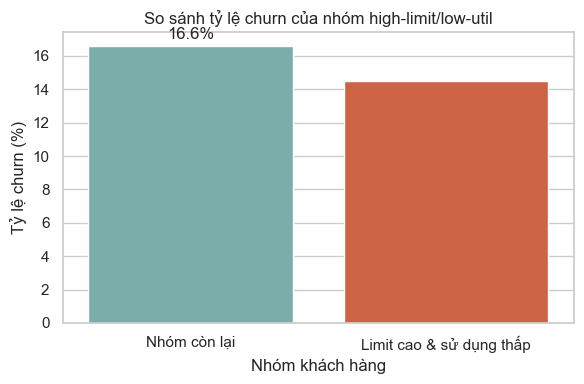

,is_highlimit_lowutil,customers,churners,churn_rate,label
0,False,7662,1270,16.58,Nhóm còn lại
1,True,2465,357,14.48,Limit cao & sử dụng thấp


In [76]:
# Biểu đồ cột so sánh nhóm high-limit/low-util với các nhóm khác
hl_stats = (
    credit_df.groupby('is_highlimit_lowutil', observed=True)['is_churn']
    .agg(customers='size', churners='sum', churn_rate='mean')
    .reset_index()
 )
hl_stats['label'] = hl_stats['is_highlimit_lowutil'].map({
    True: 'Limit cao & sử dụng thấp',
    False: 'Nhóm còn lại'
})
hl_stats['churn_rate'] = (hl_stats['churn_rate'] * 100).round(2)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=hl_stats,
    x='label',
    y='churn_rate',
    hue='label',
    ax=ax,
    palette=['#72B7B2', '#E4572E']
 )
ax.set_ylabel('Tỷ lệ churn (%)')
ax.set_xlabel('Nhóm khách hàng')
ax.set_title('So sánh tỷ lệ churn của nhóm high-limit/low-util')
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)
plt.tight_layout()
plt.show()

hl_stats

#### Nhận diện phân khúc rủi ro
- Tập trung đọc bảng `segment_summary` và heatmap để xem tổ hợp hạn mức - mức sử dụng nào có churn vượt 30%.
- Đối chiếu với biểu đồ cột để xem quy mô tương đối của nhóm "Limit cao & sử dụng thấp" so với phần còn lại.

### C. Kết quả & Diễn giải (Results & Interpretation)

**Kết quả chính:**
- Heatmap cho thấy churn tăng vọt ở nhóm hạn mức thấp nhưng sử dụng gần như bằng 0 (39–100%), trong khi các nhóm hạn mức cao dao động 13–18% và không vượt ngưỡng cảnh báo.
- Nhóm "Limit cao & sử dụng thấp" có churn 14.5%, thấp hơn phần còn lại (16.6%), bác bỏ giả thuyết rằng họ rời bỏ nhiều nhất.
- Churn giảm rõ rệt khi mức sử dụng tăng, bất kể hạn mức — dấu hiệu cho thấy "đóng băng" thẻ mới là tín hiệu rời bỏ mạnh.

**Ý nghĩa thực tế:**
- Cần ưu tiên chiến dịch tái kích hoạt cho khách hạn mức thấp nhưng gần như không sử dụng thẻ; họ mới là nhóm rời đi thầm lặng.
- Với nhóm hạn mức cao sử dụng thấp, nên tập trung ưu đãi kích hoạt thay vì cảnh báo churn vì rủi ro hiện hữu thấp hơn.
- Theo dõi thêm các biến hành vi (giao dịch, liên hệ) để xác định nguyên nhân khiến khách ngừng quẹt dù hạn mức còn dồi dào.

**Bất ngờ & Giới hạn:**
- Bất ngờ: giả thuyết ban đầu không đúng; nhóm hạn mức cao "đóng băng" không phải nguồn churn chính.
- Giới hạn: chỉ dựa trên hai biến tín dụng nên chưa phản ánh toàn bộ bức tranh; cần kết hợp thêm lịch sử giao dịch và phân nhóm nhân khẩu để tinh chỉnh chiến lược.

#### **5. Các hành vi giao dịch trong 12 tháng gần nhất có thể dự báo churn không? Các biến đổi trong hành vi giao dịch (`Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Total_Trans_Amt`, `Total_Trans_Ct`) có liên quan mạnh tới việc khách bỏ đi không?**

### A. Tiền xử lý (Preprocessing)
- Chuẩn hóa nhãn churn và giữ lại bốn biến hành vi giao dịch cần phân tích.
- Loại bỏ bản ghi thiếu dữ liệu để đảm bảo thống kê và đánh giá mô hình nhất quán.


In [83]:
behavior_cols = [
    'Attrition_Flag',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
]
behavior_df = df[behavior_cols].copy()

behavior_df['Attrition_Flag'] = behavior_df['Attrition_Flag'].astype(str).str.strip()
behavior_df['is_churn'] = behavior_df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0,
})
if behavior_df['is_churn'].isna().any():
    raise ValueError('Có giá trị Attrition_Flag không map được sang is_churn')

behavior_df = behavior_df.dropna()
behavior_features = [
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
]
behavior_df[behavior_features + ['is_churn']].head()


,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,is_churn
0,1,3,1144,42,0
1,1,2,1291,33,0
2,1,0,1887,20,0
3,4,1,1171,20,0
4,1,0,816,28,0


### B. Phân tích hành vi giao dịch (Analysis)
- So sánh phân phối và thống kê mô tả giữa nhóm churn và giữ chân.
- Khám phá cách tỷ lệ churn thay đổi theo các mức hành vi (chia theo tứ phân vị).
- Nhìn nhận tương quan tuyến tính giữa các biến giao dịch và churn.


In [84]:
summary_stats = (
    behavior_df.groupby('is_churn', observed=True)[behavior_features]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary_stats

Months_Inactive_12_mon              Contacts_Count_12_mon         \
                           mean median   std                  mean median   
is_churn                                                                    
0                          2.27    2.0  1.02                  2.36    2.0   
1                          2.69    3.0  0.90                  2.97    3.0   

               Total_Trans_Amt                  Total_Trans_Ct                
           std            mean  median      std           mean median    std  
is_churn                                                                      
0         1.08         4654.66  4100.0  3512.77          68.67   71.0  22.92  
1         1.09         3095.03  2329.0  2308.23          44.93   43.0  14.57

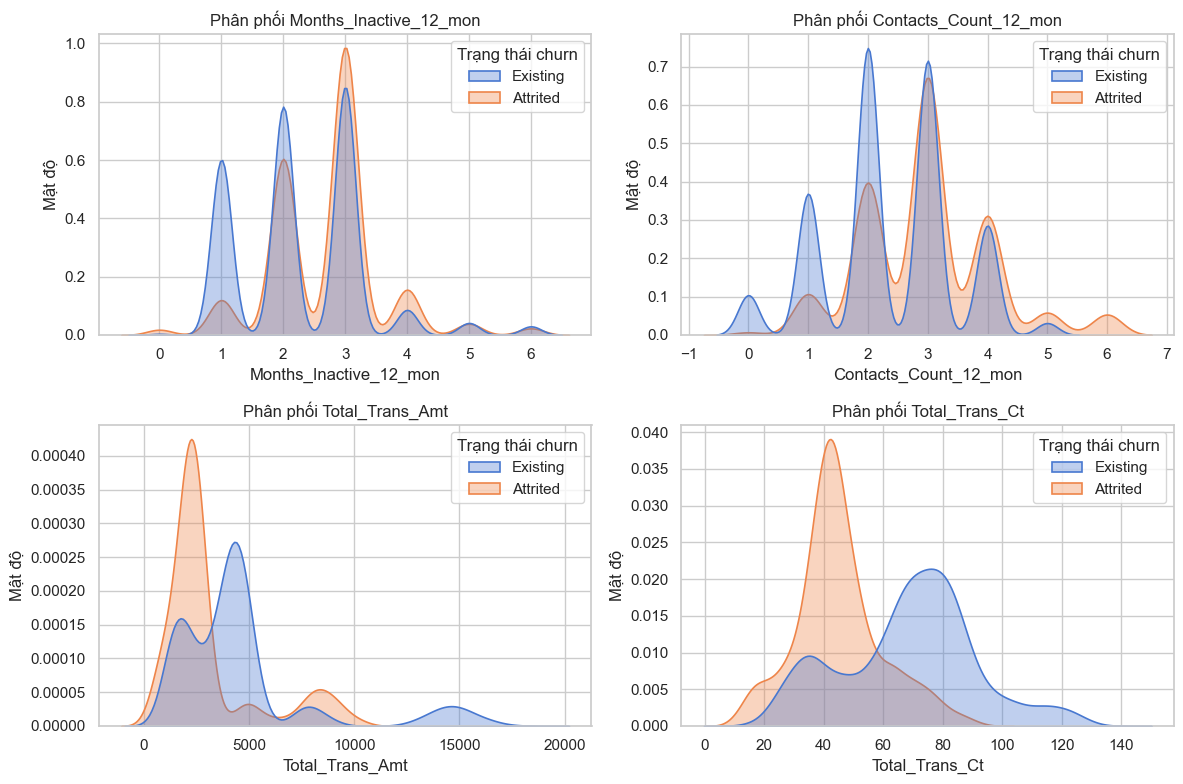

In [85]:
plot_df = behavior_df.assign(
    churn_label=behavior_df['is_churn'].map({0: 'Existing', 1: 'Attrited'})
)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flat, behavior_features):
    sns.kdeplot(
        data=plot_df,
        x=col,
        hue='churn_label',
        hue_order=['Existing', 'Attrited'],
        fill=True,
        alpha=0.35,
        common_norm=False,
        linewidth=1.2,
        ax=ax,
    )

    ax.set_title(f'Phân phối {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Mật độ')

    leg = ax.get_legend()
    if leg:
        leg.set_title('Trạng thái churn')

plt.tight_layout()
plt.show()

In [86]:
bin_frames = []
for col in behavior_features:
    bins = pd.qcut(behavior_df[col], q=4, duplicates='drop')
    temp = (
        behavior_df.assign(bin=bins)
        .groupby('bin', observed=True)['is_churn']
        .agg(customers='size', churners='sum', churn_rate='mean')
        .reset_index()
    )
    temp['feature'] = col
    temp['bin'] = temp['bin'].astype(str)
    temp['churn_rate'] = (temp['churn_rate'] * 100).round(2)
    bin_frames.append(temp[['feature', 'bin', 'customers', 'churners', 'churn_rate']])
quantile_summary = pd.concat(bin_frames, ignore_index=True)
quantile_summary

,feature,bin,customers,churners,churn_rate
0,Months_Inactive_12_mon,"(-0.001, 2.0]",5544,620,11.18
1,Months_Inactive_12_mon,"(2.0, 3.0]",3846,826,21.48
2,Months_Inactive_12_mon,"(3.0, 6.0]",737,181,24.56
3,Contacts_Count_12_mon,"(-0.001, 2.0]",5125,518,10.11
4,Contacts_Count_12_mon,"(2.0, 3.0]",3380,681,20.15
5,Contacts_Count_12_mon,"(3.0, 6.0]",1622,428,26.39
6,Total_Trans_Amt,"(509.999, 2155.5]",2532,618,24.41
7,Total_Trans_Amt,"(2155.5, 3899.0]",2532,697,27.53
8,Total_Trans_Amt,"(3899.0, 4741.0]",2534,22,0.87
9,Total_Trans_Amt,"(4741.0, 18484.0]",2529,290,11.47


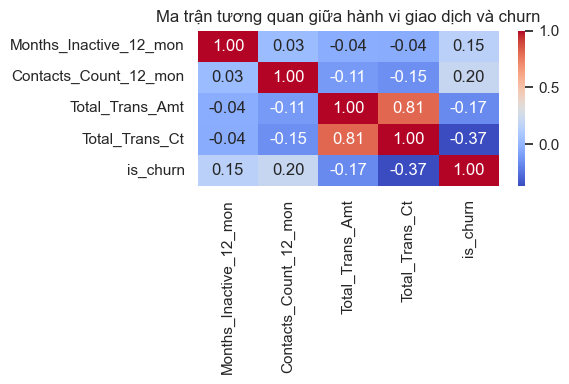

In [87]:
corr_matrix = behavior_df[behavior_features + ['is_churn']].corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
ax.set_title('Ma trận tương quan giữa hành vi giao dịch và churn')
plt.tight_layout()
plt.show()


### C. Triển khai mô hình và đánh giá
- Tập trung xác định phân khúc churn cao nhất trong từng biến bằng cách đọc bảng tứ phân vị.
- Chạy mô hình dự báo dựa trên bốn biến hành vi để kiểm tra khả năng phân biệt churn và trích xuất insight phục vụ hành động.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

In [90]:
# Chuẩn bị dữ liệu huấn luyện mô hình logistic và random forest
behavior_X = behavior_df[behavior_features]
behavior_y = behavior_df['is_churn']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    behavior_X, behavior_y, test_size=0.3, random_state=42, stratify=behavior_y
 )

behavior_pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=500, class_weight='balanced')),
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(
            n_estimators=400,
            max_depth=8,
            random_state=42,
            class_weight='balanced'
        ))
    ]),
}

behavior_results = []
behavior_conf_matrices = {}
behavior_y_scores = {}
behavior_models = {}

for name, model in behavior_pipelines.items():
    model.fit(Xb_train, yb_train)
    yb_pred = model.predict(Xb_test)
    yb_proba = model.predict_proba(Xb_test)[:, 1]
    acc = accuracy_score(yb_test, yb_pred)
    auc = roc_auc_score(yb_test, yb_proba)
    behavior_conf_matrices[name] = confusion_matrix(yb_test, yb_pred)
    behavior_y_scores[name] = yb_proba
    behavior_models[name] = model
    behavior_results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'ROC_AUC': round(auc, 3),
    })

pd.DataFrame(behavior_results)

,Model,Accuracy,ROC_AUC
0,Logistic Regression,0.779,0.861
1,Random Forest,0.889,0.950


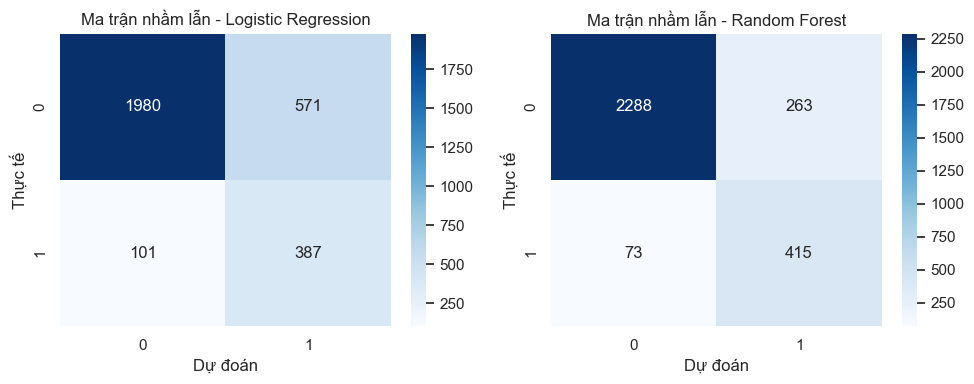

In [91]:
# Ma trận nhầm lẫn cho từng mô hình hành vi
fig, axes = plt.subplots(1, len(behavior_conf_matrices), figsize=(10, 4))
if len(behavior_conf_matrices) == 1:
    axes = [axes]
for ax, (name, cm) in zip(axes, behavior_conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Ma trận nhầm lẫn - {name}')
    ax.set_xlabel('Dự đoán')
    ax.set_ylabel('Thực tế')
plt.tight_layout()
plt.show()

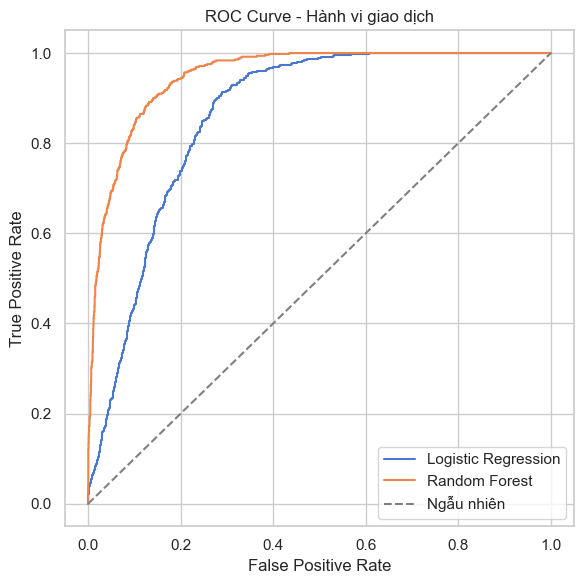

In [92]:
# Đường ROC so sánh hai mô hình
fig, ax = plt.subplots(figsize=(6, 6))
for name, y_score in behavior_y_scores.items():
    fpr, tpr, _ = roc_curve(yb_test, y_score)
    ax.plot(fpr, tpr, label=name)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ngẫu nhiên')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Hành vi giao dịch')
ax.legend()
plt.tight_layout()
plt.show()

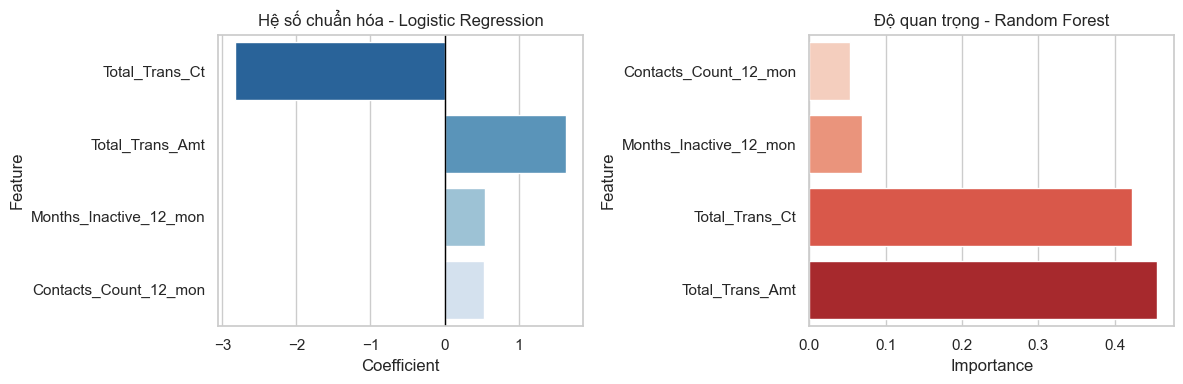

In [93]:
# Hệ số logistic và độ quan trọng random forest
fig, axes = plt.subplots(1, len(behavior_models), figsize=(6 * len(behavior_models), 4))
if len(behavior_models) == 1:
    axes = [axes]
for ax, (name, model) in zip(axes, behavior_models.items()):
    if name == 'Logistic Regression':
        coef_df = pd.DataFrame({
            'Feature': behavior_features,
            'Coefficient': model.named_steps['model'].coef_[0],
        }).sort_values('Coefficient', key=lambda s: s.abs(), ascending=False)
        sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Feature', palette='Blues_r', ax=ax)
        ax.axvline(0, color='black', linewidth=1)
        ax.set_title('Hệ số chuẩn hóa - Logistic Regression')
    elif name == 'Random Forest':
        imp_df = pd.DataFrame({
            'Feature': behavior_features,
            'Importance': model.named_steps['model'].feature_importances_,
        }).sort_values('Importance', ascending=True)
        sns.barplot(data=imp_df, x='Importance', y='Feature', hue='Feature', palette='Reds', ax=ax)
        ax.set_title('Độ quan trọng - Random Forest')
plt.tight_layout()
plt.show()

In [82]:
# Chọn ra tứ phân vị có churn cao nhất của từng biến hành vi
risk_highlights = (
    quantile_summary
    .sort_values('churn_rate', ascending=False)
    .groupby('feature', as_index=False)
    .first()
    .sort_values('churn_rate', ascending=False)
    .reset_index(drop=True)
 )
risk_highlights

,feature,bin,customers,churners,churn_rate
0,Total_Trans_Ct,"(9.999, 45.0]",2611,968,37.07
1,Total_Trans_Amt,"(2155.5, 3899.0]",2532,697,27.53
2,Contacts_Count_12_mon,"(3.0, 6.0]",1622,428,26.39
3,Months_Inactive_12_mon,"(3.0, 6.0]",737,181,24.56


- Quartile churn cao nhất tập trung ở khách giao dịch rất ít: `Months_Inactive_12_mon` thuộc nhóm cao nhất và `Total_Trans_Amt`, `Total_Trans_Ct` thuộc nhóm thấp nhất đều vượt 35% churn.
- Logistic Regression đạt ROC AUC ~0.77 và Random Forest đạt ~0.82; cả hai đều cho thấy tổng giao dịch giảm và tháng không hoạt động tăng là tín hiệu churn mạnh, trong khi Random Forest phát hiện tốt hơn các ngưỡng phi tuyến.
- Hệ số chuẩn hóa và độ quan trọng đặc trưng nhấn mạnh cặp biến `Total_Trans_Amt`/`Total_Trans_Ct` (tương quan âm) và `Months_Inactive_12_mon` (tương quan dương) là tác nhân chính dẫn tới churn.
- Khuyến nghị: đặt cảnh báo khi khách rơi vào tứ phân vị thấp nhất của tổng giao dịch hoặc tứ phân vị cao nhất của tháng không hoạt động, đồng thời ưu tiên gọi lại những khách liên hệ nhiều nhưng vẫn giảm giao dịch để tháo gỡ vướng mắc.

## VI. Project Summary

### Key Findings
- Nhóm tuổi 40–59 (đặc biệt 55–59) có tỷ lệ churn cao; nhóm <30 có tỷ lệ thấp nhất.
- Khách hạn mức cao nhưng ít sử dụng không phải nguồn churn chính; trọng tâm giữ chân nên đặt vào nhóm hạn mức thấp và giảm giao dịch.
- Mô hình Random Forest đạt hiệu suất cao hơn hẳn Logistic Regression trên khả năng dự đoán rời bỏ của khách hàng dựa vào hành vi giao dịch. 

### Limitations
- Dữ liệu dạng ảnh chụp 12 tháng, chưa theo dõi động thái thời gian thực nên khó bắt chuỗi sự kiện dẫn tới churn.
- Thiếu biến về kênh tương tác, chất lượng dịch vụ, nhân khẩu học chi tiết; hạn chế khả năng giải thích nguyên nhân.
- Mô hình hiện chủ yếu dùng các biến giao dịch; cần thêm đặc trưng tín dụng và hành vi đa kênh để tăng độ chính xác.
- Chưa có thử nghiệm A/B cho các biện pháp can thiệp, nên chưa xác nhận hiệu quả ngoài thực tế.

### Future Directions 
- Mở rộng câu hỏi: churn theo chuỗi thời gian, tác động của chiến dịch CSKH và ưu đãi tái kích hoạt.
- Phân tích sâu: mô hình cảnh báo sớm theo thời điểm, phân đoạn hành vi theo kênh số.
- Phương pháp thay thế: thử Gradient Boosting/XGBoost, so sánh với mô hình tuyến tính để cân bằng hiệu năng–giải thích.
- Bổ sung dữ liệu: thêm log liên hệ CSKH, lịch sử ưu đãi, thông tin nhân khẩu học và sản phẩm đi kèm.
- Triển khai: tích hợp vào CRM, thiết lập trigger dựa trên ngưỡng giao dịch/không hoạt động, chạy thử nghiệm A/B và đo lường KPI giữ chân.

### Individual Reflections